# Examples of usage

In [1]:
import logging

In [2]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [3]:
from core import WMFileSource, PythonSource, MaxToMin, GreedyTranspOne, GreedyTranspMany, PartialSolution
from algorithm import *

# Small Instance

In [4]:
data_s = PythonSource(
    data=[8, 6, 7, 4, 5],
    mapper=float,
    gatherer=list,
)
m_s = 3

## Gurobi

In [5]:
gurobi_s = GurobiSolver().solve(data_s.get_data(), m_s)
gurobi_s

Set parameter Username
Academic license - for non-commercial use only - expires 2022-01-27
Set parameter TimeLimit to value 300
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 15 columns and 15 nonzeros
Model fingerprint: 0x255c147a
Model has 45 quadratic objective terms
Variable types: 0 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+01, 2e+02]
  QObjective range [3e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 600.0000000
Presolve time: 0.00s
Presolved: 35 rows, 45 columns, 105 nonzeros
Variable types: 0 continuous, 45 integer (45 binary)

Root relaxation: objective -1.100000e+02, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | 

Statistics for partial solution 140409685644528.
IS_FULL:True
SETS:
0: 7.0 4.0
1: 6.0 5.0
2: 8.0
Diffs: [ 1.  1. -2.]
Sum Abs Errors: 4.0
STD: 1.4142135623730951

## Greedy Algorithm

In [6]:
greedy_s = GreedySolver().solve(data_s.get_data(), m_s)
greedy_s

Statistics for partial solution 140410740151728.
IS_FULL:True
SETS:
0: 8.0
1: 7.0 4.0
2: 6.0 5.0
Diffs: [-2.  1.  1.]
Sum Abs Errors: 4.0
STD: 1.4142135623730951

## Karmarkar-Karp

In [7]:
kk_s = KarmarkarKarp().solve(data_s.get_data(), m=m_s)
kk_s

Statistics for partial solution 140409685682400.
IS_FULL:True
SETS:
0: 8.0
1: 4.0 7.0
2: 5.0 6.0
Diffs: [-2.  1.  1.]
Sum Abs Errors: 4.0
STD: 1.4142135623730951

## Simulated Annealing

In [8]:
sa_s = SimulatedAnnealing(
    PartialSolution.from_solution([[8, 7, 4, 6, 5], [], []]),
    move=GreedyTranspOne,
    temperature_func=temperature_div,
    t_max=10**6,
    t_min=10**-12,
    max_iter=10**2,
).solve(
    [8, 7, 4, 6, 5],
    3,
)
sa_s


Statistics for partial solution 140409685807408.
IS_FULL:True
SETS:
0: 6 5
1: 8
2: 7 4
Diffs: [ 1. -2.  1.]
Sum Abs Errors: 4.0
STD: 1.4142135623730951

In [9]:
sa_s = SimulatedAnnealing(
    PartialSolution.from_solution([[8, 7, 4, 6, 5], [], []]),
    move=MaxToMin,
    temperature_func=temperature_div,
    t_max=10**6,
    t_min=10**-12,
    max_iter=10**2,
).solve(
    [8, 7, 4, 6, 5],
    3,
)
sa_s


Statistics for partial solution 140409685811504.
IS_FULL:True
SETS:
0: 7 4
1: 8
2: 6 5
Diffs: [ 1. -2.  1.]
Sum Abs Errors: 4.0
STD: 1.4142135623730951

## Tabu Search

In [10]:
tabu_s = TabuSearch(
    PartialSolution.from_solution([[8, 7, 4, 6, 5], [], []]),
    move=TranspOneTabu,
    ttl=1_000,
    max_iter=1_000,
).solve(
    [8, 7, 4, 6, 5],
    m_s,
)
tabu_s

Statistics for partial solution 140409685786576.
IS_FULL:True
SETS:
0: 4 6
1: 8 5
2: 7
Diffs: [ 0.  3. -3.]
Sum Abs Errors: 6.0
STD: 2.449489742783178

# Larger instance

In [11]:
data_l = WMFileSource(
    filepath='instances/data.wm',
    mapper=int,
    gatherer=list,
)
m_l = 20

## Gurobi

In [36]:
gurobi_l = GurobiSolver(timelimit=600).solve(data_l.get_data(), m_l)
gurobi_l


Set parameter TimeLimit to value 600
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 235 rows, 4700 columns and 4700 nonzeros
Model fingerprint: 0x51d76d99
Model has 554600 quadratic objective terms
Variable types: 0 continuous, 4700 integer (4700 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+09, 8e+11]
  QObjective range [3e+06, 6e+11]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective 4.241330e+14
Presolve time: 0.08s
Presolved: 235 rows, 4700 columns, 4700 nonzeros
Presolved model has 554600 quadratic objective terms
Variable types: 0 continuous, 4700 integer (4700 binary)
Found heuristic solution: objective 3.120287e+13

Root relaxation: objective 0.000000e+00, 2580 iterations

 65365 52887    0.00009  546   32 8192996.00    0.00009   100%  97.6  456s
 66761 53737    0.00009  636   35 8192996.00    0.00009   100%  96.6  460s
 67713 54574    0.00009  712   31 8192996.00    0.00009   100%  96.0  465s
 68642 55103    0.00009  133   26 8192996.00    0.00009   100%  95.6  478s
 69201 55898    0.00009  133   27 8192996.00    0.00009   100%  95.6  482s
 70064 56696    0.00009  232   32 8192996.00    0.00009   100%  95.7  485s
 72097 58761    0.00009  395   31 8192996.00    0.00009   100%  96.0  495s
 73286 60238    0.00009  519   27 8192996.00    0.00009   100%  95.9  501s
 75081 61560    0.00009  620   29 8192996.00    0.00009   100%  95.1  526s
 76852 63186    0.00009  769   29 8192996.00    0.00009   100%  94.3  533s
 79078 64280    0.00009  198   34 8192996.00    0.00009   100%  93.9  539s
 80343 65453    0.00009  385   31 8192996.00    0.00009   100%  93.9  544s
 81605 66616    0.00009  607   33 8192996.00    0.00009   100%  94.0  550s
 82798 68286 3744206.32  

Statistics for partial solution 140405053416256.
IS_FULL:True
SETS:
0: 50322 7059 4830 23181 50152 46999 50579 56643 52350 24611 27707 49158 25623 16959 28470 5999 52164 6415 13030 51051 10360 11812 24948 25873 25408 9152 5968 51914 50472 82469 49526 65415
1: 53662 67749 46912 63754 45268 206707 10373 270015 31435 18793 20440 11501 14485 34194 45839 47239 68027
2: 23256 282977 23080 69933 78406 81724 78134 228372 26308 55124 29092 80457
3: 40868 19311 22890 208596 260107 37140 28756 26581 44229 84438 283620
4: 89859 38206 85270 30807 4967 63483 240554 271928 20981 30137 7314 62852 22893 87100
5: 86687 75469 57954 67680 66543 63333 49046 297393 1471 38230 76620 86717 88870
6: 60486 6276 21309 74335 35133 293515 34940 27698 314306 20176 44558 57889 66449
7: 8993 1933 51893 30247 60230 254474 234039 298160 44446 71640
8: 88151 92414 45821 11015 53692 45444 33906 3606 1502 46232 83809 201347 86551 262574
9: 90314 264621 30733 240534 210543 219218
10: 96607 94830 17355 98472 97302 92820 351

## Greedy Algorithm

In [12]:
greedy_l = GreedySolver().solve(data_l.get_data(), m_l)
greedy_l

Statistics for partial solution 140410740051728.
IS_FULL:True
SETS:
0: 23256 69547 30247 45444 51051 387162 89243 81049 60230 16676 201347
1: 375698 21309 89859 50152 206707 81724 18793 38229 37140 71640 65415
2: 19311 372906 49903 65893 38206 90314 38230 20440 208596 70866 82469
3: 88151 40868 1933 49046 23080 95292 1302 357826 14485 71789 34194 68027 210543
4: 80539 53662 211791 46912 55712 27698 6415 26581 99148 9948 88870 349541
5: 8993 346671 7059 56643 27707 52539 78372 27196 86760 98418 47239 219218
6: 92616 73494 34999 16959 228372 87745 40264 49418 22385 342797 66449
7: 92018 339311 30807 3606 59258 84625 234039 23523 51914 44558 78777 14191
8: 66543 35133 69933 339195 25408 9152 83809 39093 7314 49526 240534 91393
9: 57954 5979 52350 78406 28470 85270 26308 330057 10360 240554 94676 46232
10: 67680 252972 47520 11015 90727 45268 24611 327670 83002 5968 70270 30137
11: 22890 4519 67749 72297 34940 49158 13030 314306 254474 95204 87578 40391
12: 15822 50601 74335 23181 1471 637

## Karmarkar-Karp

In [13]:
kk_l = KarmarkarKarp().solve(data_l.get_data(), m=m_l)
kk_l


Statistics for partial solution 140409685815248.
IS_FULL:True
SETS:
0: 25623 40391 34940 80457 55712 311060 260107 92820 87539 50472 16676
1: 45444 72297 65415 30137 53662 293515 279671 92359 83946 22890 11501 4967
2: 45268 74335 63483 30247 297393 271928 94830 87100 51893 22385 16959
3: 46232 69547 68027 28470 372906 208596 90314 82469 49418 23523 10360 5999
4: 26308 38230 37140 79350 56643 342797 228372 92616 87745 50322 9948 6415
5: 46912 70866 66543 28215 375698 206707 89859 81724 49526 23256 11812 4830
6: 38229 38206 78777 56716 24948 339311 234039 92018 84625 52539 10588 5979
7: 26581 39175 35129 76620 60230 357826 210543 95292 88151 49903 10373 6276
8: 25873 41794 33906 80539 55124 303036 262574 98472 87268 50579 15515 1502
9: 46999 78134 59258 27707 387162 201347 89243 81049 47520 20440 17355
10: 25408 40264 34999 78406 57889 298160 270015 96607 86551 51051 11015 5968
11: 25811 40868 34194 78372 57954 289260 282977 92414 86687 50601 15822 1471
12: 45839 69933 67749 28756 327670

## Simulated Annealing

In [19]:
%%time
sa_l = SimulatedAnnealing(
    kk_l,
    move=GreedyTranspMany,
    temperature_func=temperature_div,
    t_max=10**7,
    t_min=10**-9,
    max_iter=10**3 * 5,
).solve(
    data_l,
    m_l,
)
sa_l


CPU times: user 4.59 s, sys: 15.6 ms, total: 4.6 s
Wall time: 4.58 s


Statistics for partial solution 140409646506672.
IS_FULL:True
SETS:
0: 87539 65415 293515 51893 84625 25873 1502 201347 40264 78372 1471 23080 1933 1302 98418
1: 28470 37140 5979 95292 387162 60486 86717 47239 75173 211791 21309
2: 87100 208596 49418 79350 56643 66543 38206 20440 298160 7059 27698 97302 19311
3: 74335 94830 228372 50322 375698 5968 86687 35133 31435 52164 21753
4: 372906 90314 82469 70866 49526 38229 56716 6276 27707 240534 20981
5: 34940 92820 45444 68027 6415 234039 86551 314306 22893 4519 63754 29092 53582
6: 22890 4830 26581 39175 210543 55124 95204 50152 301803 83809 71789 94676
7: 40391 11501 26308 60230 357826 46999 69933 83002 254474 91393 14485
8: 260107 16676 46232 10360 35129 303036 57954 92414 49158 30807 84438 70270
9: 30137 81724 11015 50601 252972 90727 24611 44446 73494 14191 330057 52350
10: 69547 92616 46912 262574 59258 8993 27196 39093 85270 18793 346671
11: 10373 33906 98472 87268 78134 289260 15822 349541 62852 30733
12: 92359 45268 297393 5999 20

## Tabu Search

In [26]:
%%time
tabu_l = TabuSearch(
    sa_l,
    move=SwapMinMaxTabu,
    ttl=3000,
    max_iter=10**4,
).solve(
    data_l.get_data(),
    m_l,
)
tabu_l

CPU times: user 13.5 s, sys: 0 ns, total: 13.5 s
Wall time: 13.5 s


Statistics for partial solution 140409634591312.
IS_FULL:True
SETS:
0: 87539 65415 293515 51893 84625 25873 1502 201347 40264 78372 1471 23080 1933 1302 98418
1: 28470 37140 5979 95292 387162 60486 86717 47239 75173 211791 21309
2: 87100 208596 49418 79350 56643 66543 38206 20440 298160 7059 27698 97302 19311
3: 74335 94830 228372 50322 375698 5968 86687 35133 31435 52164 21753
4: 372906 90314 82469 70866 49526 38229 56716 6276 27707 240534 20981
5: 34940 92820 45444 68027 6415 234039 86551 314306 22893 4519 63754 29092 53582
6: 22890 4830 26581 39175 210543 55124 95204 50152 301803 83809 71789 94676
7: 40391 11501 26308 60230 357826 46999 69933 83002 254474 91393 14485
8: 260107 16676 46232 10360 35129 303036 57954 92414 49158 30807 84438 70270
9: 30137 81724 11015 50601 252972 90727 24611 44446 73494 14191 330057 52350
10: 69547 92616 46912 262574 59258 8993 27196 39093 85270 18793 346671
11: 10373 33906 98472 87268 78134 289260 15822 349541 62852 30733
12: 92359 45268 297393 5999 20

In [27]:
tabu_l = TabuSearch(
    greedy_l,
    move=SwapMinMaxTabu,
    ttl=3000,
    max_iter=10**4,
).solve(
    data_l.get_data(),
    m_l,
)
tabu_l

Statistics for partial solution 140409685647024.
IS_FULL:True
SETS:
0: 32633 69547 21753 45444 51051 387162 89243 81049 60230 16676 201347
1: 375698 21309 89859 50152 206707 81724 18793 38229 37140 71640 65415
2: 19311 372906 49903 65893 38206 90314 38230 208596 20176 70866 82469
3: 88151 40868 1933 49046 23080 95292 1302 357826 14485 71789 34194 68027 210543
4: 80539 53662 211791 46912 55712 27698 6415 26581 99148 9948 88870 349541
5: 8993 346671 7059 56643 27707 52539 78372 27196 86760 98418 47239 219218
6: 23256 35133 92616 73494 16959 228372 87745 40264 49418 342797 66449
7: 92018 339311 30807 3606 59258 84625 234039 23523 51914 44558 78777 14191
8: 66543 34999 69933 339195 25408 9152 83809 39093 7314 49526 240534 91393
9: 57954 5979 52350 78406 28470 85270 26308 330057 10360 240554 94676 46232
10: 67680 252972 47520 11015 90727 45268 24611 327670 83002 5968 70270 30137
11: 22890 4519 67749 72297 34940 49158 13030 314306 254474 95204 87578 40391
12: 15822 50601 74335 23181 1471 637

## Ant Colony Optimization


In [ ]:
%%time
aco_l = ACO(
    ants_n=20,
    max_iter=1_00,
).solve(
    data_l.get_data(),
    m_l,
)
aco_l

## Genetic Algorithms

In [ ]:
%%time



# Benchmarking

In [19]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
df = pd.DataFrame(
    [
#         ["Exact (timelimit=5)", gurobi_l.abs_error],
        ["Greedy", greedy_l.abs_error],
        ["Karmarkar-Karp", kk_l.abs_error],
        ["Simulated Annealing", sa_l.abs_error],
        ["Tabu Search", tabu_l.abs_error],
    ],
    columns=['Algorithm', "Sum Abs Errors"]
)
df

,Algorithm,Sum Abs Errors
0,Greedy,9332.0
1,Karmarkar-Karp,10714.0
2,Simulated Annealing,5078.0
3,Tabu Search,4282.0


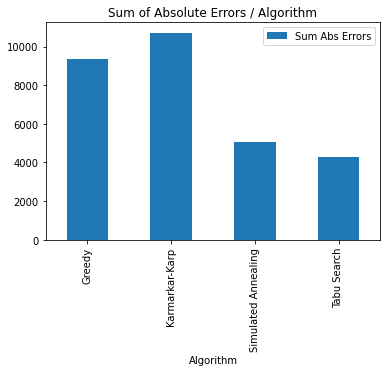

In [35]:
df[["Algorithm", "Sum Abs Errors"]].set_index("Algorithm").plot.bar(title='Sum of Absolute Errors / Algorithm');